<a href="https://colab.research.google.com/github/Raswanth-Prasath/Basic-Neural-Network-Models/blob/main/Basic_Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
#Create a model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=10, out_feature=3):
        super().__init__() #instantiate out nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feature)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))

      return self.out(x)


In [33]:
#Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [36]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-37-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [38]:
#Train Test Split!
X = my_df.drop('species', axis=1)
y = my_df['species']

In [39]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
# Covert these to numpy arrays
X = X.values
y = y.values

In [41]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split

In [42]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [44]:
# Convert X features to float tensor
X_train = torch.FloatTensor(X_train) #because the vaules are in float
X_test = torch.FloatTensor(X_test)
# Convert X features to float tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [46]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer (pouplar one), lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)>

In [50]:
# Train our model
# Determine how many Epochs do we want? Epochs - one run thru all the training data in our network
epochs = 100
losses = []
for i in range (epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results


  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predited vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error rate of forward propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1582398414611816
Epoch: 10 and loss: 0.9326896667480469
Epoch: 20 and loss: 0.6586032509803772
Epoch: 30 and loss: 0.42405274510383606
Epoch: 40 and loss: 0.2622014880180359
Epoch: 50 and loss: 0.14830343425273895
Epoch: 60 and loss: 0.08895330876111984
Epoch: 70 and loss: 0.061498209834098816
Epoch: 80 and loss: 0.04822752624750137
Epoch: 90 and loss: 0.04085192456841469


Text(0.5, 0, 'epochs')

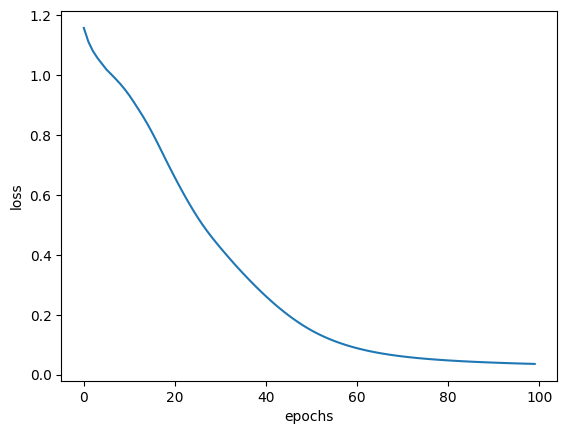

In [51]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [52]:
# Evaluate model on the Test data Set (validate model on the test data)
with torch.no_grad(): # Turn off the back propagation
  y_eval = model.forward(X_test) # X_test are features from our test sets , y_eval will be the predictions by our model
  loss = criterion(y_eval,  y_test) # To find the loss or the error
  print(f'loss: {loss}')


loss: 0.13723760843276978


In [58]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of species of flower  our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}' )

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f' We got {correct} correct out of {len(y_test)}')


1.) tensor([-7.7504,  3.2623,  6.3562]) 	 2
2.) tensor([-11.1168,   2.6563,  10.1439]) 	 2
3.) tensor([-11.5444,   3.4941,  10.2483]) 	 2
4.) tensor([-2.9464,  5.0645,  0.6303]) 	 1
5.) tensor([-9.5197,  3.5429,  8.1172]) 	 2
6.) tensor([ 0.0145,  5.9742, -2.7949]) 	 1
7.) tensor([-6.8699,  3.9501,  5.1929]) 	 2
8.) tensor([-2.6824,  5.2435,  0.2994]) 	 1
9.) tensor([-8.1766,  3.7706,  6.6281]) 	 2
10.) tensor([-11.8059,   2.8351,  10.7927]) 	 2
11.) tensor([-6.5282,  4.0046,  4.8077]) 	 2
12.) tensor([ 17.1754,  10.9587, -22.5397]) 	 0
13.) tensor([ 15.5426,   9.9092, -20.4289]) 	 0
14.) tensor([ 1.3130,  5.5153, -3.9659]) 	 1
15.) tensor([ 14.6556,  10.0717, -19.6696]) 	 0
16.) tensor([-6.0170,  4.1560,  4.1833]) 	 2
17.) tensor([ 15.4531,  10.0451, -20.4756]) 	 0
18.) tensor([-7.4649,  3.4989,  5.9608]) 	 1
19.) tensor([ 16.4620,  10.5057, -21.6216]) 	 0
20.) tensor([ 13.7478,   9.1136, -18.3330]) 	 0
21.) tensor([ 0.7047,  5.6449, -3.3978]) 	 1
22.) tensor([-10.8149,   3.2834,   9.

In [59]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [60]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 16.5929,  10.5468, -21.7585])


In [62]:
# Save our NN Model
torch.save(model.state_dict(), 'my_iris_model.pt')


In [66]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt', weights_only=True))

<All keys matched successfully>

In [67]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)